**Importing necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

**Since There are very less categorical features, so representing them using numbers**

In [ ]:
#feature engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
x = x.drop(['Geography','Gender'],axis = 1)

In [ ]:
x = pd.concat([x,geography,gender],axis = 1)

**Splitting data into train test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

**Difference between fit_transform and Transform**

StandardScaler is used to standardize the dataset's features by removing the mean and scaling to unit variance.

fit_transform is used on the training data to learn the scaling parameters (mean and standard deviation) and then transform the training data.

transform is used on the test data to apply the same scaling parameters learned from the training data. This ensures that the test data is scaled in the same way as the training data, preventing data leakage and ensuring consistent scaling across the dataset.

In [ ]:
#Feature Scaling
#StandardScaler is mostly used for ANN and Min-MaxScaler is used for CNN

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**CREATING AN ARTIFICIAL NEURAL NETWORK**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#Inititalizing ANN
classifier = Sequential()

In [ ]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#Adding 1st Hidden Layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#Adding 2nd Hidden Layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#Adding Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

**Configuring the Model for Training The model**

In [ ]:
#here instead of adam we can pass our own optimizer value like opt used here
classifier.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

**Stop training when a monitored metric has stopped improving.**

In [ ]:

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

**Training The Model**

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7631 - loss: 0.5379 - val_accuracy: 0.7952 - val_loss: 0.4450
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8038 - loss: 0.4477 - val_accuracy: 0.8201 - val_loss: 0.4272
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8182 - loss: 0.4223 - val_accuracy: 0.8247 - val_loss: 0.4207
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8133 - loss: 0.4291 - val_accuracy: 0.8311 - val_loss: 0.4126
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8259 - loss: 0.4071 - val_accuracy: 0.8292 - val_loss: 0.4052
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8341 - loss: 0.3967 - val_accuracy: 0.8311 - val_loss: 0.3981
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8330 - loss: 0.3914 - val_accuracy: 0.8334 - val_loss: 0.3929
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3916 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Summarizing training and testing accuracy**

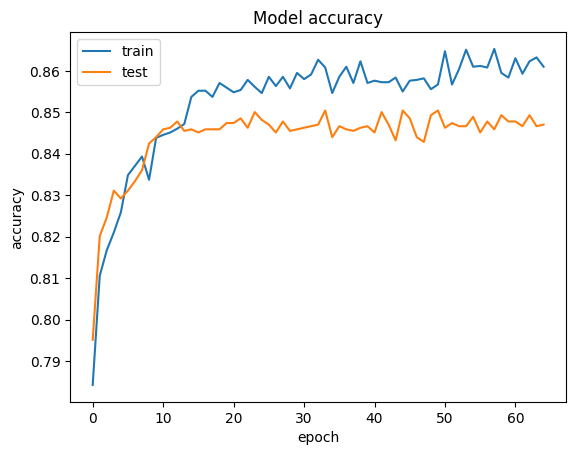

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

**Summarizing Loss function**

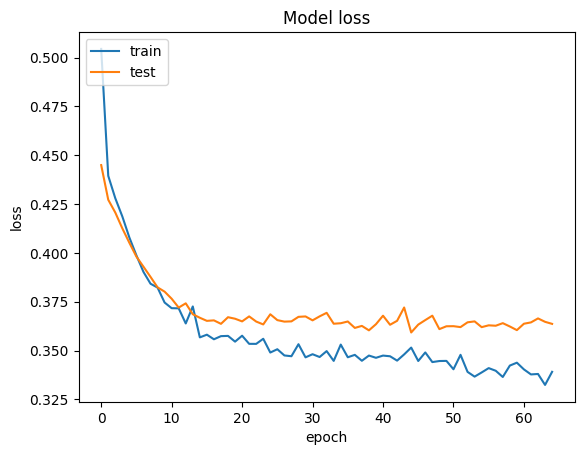

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#Making the predictions

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [ ]:
print(score)

0.8505


In [ ]:
cm

array([[1545,   62],
       [ 237,  156]])

In [ ]:
#getting the weights
classifier.get_weights()

[array([[ 0.2636634 , -0.00701071,  0.30396616, -0.0025464 ,  0.41067013,
          0.01220425,  0.09923858, -0.13508034,  0.01074363, -0.0053264 ,
          0.01125235],
        [ 0.26279834, -0.15815927,  0.4621426 ,  0.22587258,  0.0990427 ,
         -0.5745221 , -0.6565409 ,  0.33231   , -0.7526342 ,  0.46126527,
         -0.6516651 ],
        [-0.06419637, -0.10043424,  0.04285768, -0.23237367, -0.00881562,
         -0.04458953,  0.10047855, -0.187961  , -0.26918945, -0.05239093,
         -0.0152258 ],
        [ 0.05529704, -0.36537105, -0.04112318,  0.27814713,  0.06101071,
         -0.03642428, -0.07238455, -0.21227144, -0.1356278 , -0.39017156,
         -0.0672172 ],
        [ 0.31236756, -1.5183086 ,  0.14376484,  1.2423496 , -0.12745005,
         -0.09428263, -0.48785582, -0.14099963, -0.27860215,  0.3759056 ,
          0.0404507 ],
        [-0.0608403 , -0.14607666, -0.0447521 , -0.316362  , -0.21388072,
          0.43347222,  0.12883249, -0.19976556, -0.43276596, -0.3623311